In [6]:
import matplotlib.pyplot as plt
import random

class Perceptron2: 
    def __init__(self):
        self.w0 = random.random()
        self.w1 = random.random()
        self.b  = random.random()

    def predecir(self, x1, x2):
        return 1 if (self.w0 * x1 + self.w1 * x2 + self.b) >= 0 else 0
    
    def aprender(self, X, y, ajuste=0.1, epochs=100):
        for epoch in range(epochs):
            errores = 0
            for (x1, x2), yr in zip(X, y):
                yp = self.predecir(x1, x2)

                error = yr - yp # cálculo del error
                self.w0 += error * x1 * ajuste
                self.w1 += error * x2 * ajuste
                self.b  += error * ajuste

                errores += abs(error)
            
            if errores == 0:
                print(f"Convergió en {epoch} épocas.")
                return



In [59]:


X = [(0,0), (0,1), (1,0), (1,1)]  # Entradas de la función AND
y_labels = [0, 1, 1, 0]  # Función XOR

random.seed(1)
p = Perceptron2()
p.aprender(X, y_labels, ajuste=0.2, epochs=1_000_000)
print(f"Pesos finales: w0={p.w0:.2f}, w1={p.w1:.2f}, b={p.b:.2f}")
for (x1, x2), y in zip(X, y_labels):
    print(f"Entrada: ({x1}, {x2}) => Salida: {p.predecir(x1, x2)} (Esperado: {y})")


Pesos finales: w0=-0.27, w1=-0.15, b=0.16
Entrada: (0, 0) => Salida: 1 (Esperado: 0)
Entrada: (0, 1) => Salida: 1 (Esperado: 1)
Entrada: (1, 0) => Salida: 0 (Esperado: 1)
Entrada: (1, 1) => Salida: 0 (Esperado: 0)


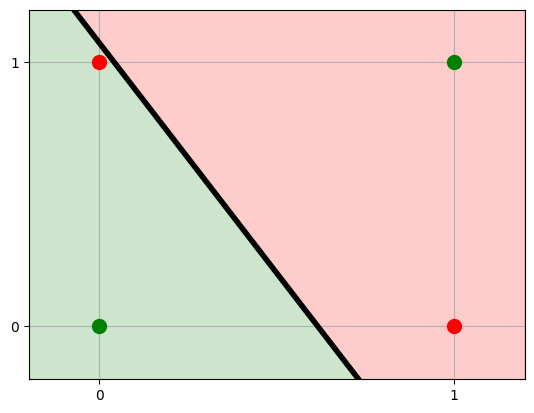

In [60]:
def graficar(p, X, y_labels):
    def f(p, x):
        if p.w1 == 0: return 0
        return (-p.w0 * x  - p.b) / p.w1

    x1, x2 = -0.2, 1.2
    
    plt.xlim(x1, x2)
    plt.ylim(x1, x2)
    plt.xticks([0, 1])
    plt.yticks([0, 1])
    plt.grid(True)

    y1 = f(p, x1)
    y2 = f(p, x2)
    plt.plot([x1, x2], [y1, y2], 'k-', linewidth=4)
    plt.fill_between([x1, x2], [y1, y2], -1, color='green', alpha=0.2)
    plt.fill_between([x1, x2], [y1, y2], 2, color='red', alpha=0.2)
    
    for (x1, x2), y in zip(X, y_labels):
        color = 'ro' if y == 1 else 'go'
        plt.plot(x1, x2, color, markersize=10)

    
graficar(p, X, y_labels)